In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.DataFrame({
    "studyhours":[1,2,3,4,5],
    "marks":[2,4,5,4,5]
})
df

,studyhours,marks
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [5]:
x=df[["studyhours"]]
y=df[["marks"]]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [8]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)


In [9]:
model=LinearRegression()
model.fit(x_train_poly,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
y_train_pred=model.predict(x_train_poly)
y_test_pred=model.predict(x_test_poly)


In [11]:
print("training mse:",mean_squared_error(y_train,y_train_pred))
print("training mse:",mean_squared_error(y_test,y_test_pred))

training mse: 0.22499999999999998
training mse: 0.6944444444444454


C:\Users\yvsur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


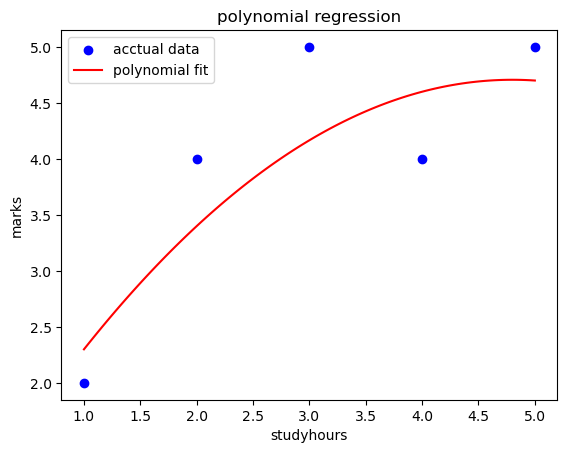

In [17]:
plt.scatter(x,y,color="blue",label="acctual data")
xline=np.linspace(min(x["studyhours"]),max(x["studyhours"]),100).reshape(-1,1)
yline=model.predict(poly.transform(xline))
plt.plot(xline,yline,color="red",label="polynomial fit")
plt.xlabel("studyhours")
plt.ylabel("marks")
plt.title("polynomial regression")
plt.legend()
plt.show()
